In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  


In [6]:
df = pd.read_csv('csv/gameandgrade.csv')

In [7]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [8]:
# Define independent variables (X) and dependent variable (y)
X = df.drop(columns=["Grade"])  # Features
y = df["Grade"]  # Target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

ValueError: could not convert string to float: '92..00'

In [16]:
print(df["Grade"].unique())  # See unique values in the Grade column


['77.50' '83.00' '80.00' '45.00' '85.00' '55.00' '60.00' '88.00' '90.00'
 '74.00' '95.00' '50.00' '98.00' '87.00' '70.00' '65.00' '76.50' '61.00'
 '99.00' '77.00' '100' '75.00' '69.00' '67.00' '79.00' '36.50' '92.00'
 '93.00' '90.70' '78.00' '68.00' '64.00' '42.35' '72.50' '40.00' '63.00'
 '86.00' '62.00' '89.00' '48.00' '57.75' '94.00' '66.00' '71.00' '91.00'
 '57.00' '76.00' '73.00' '97.66' '82.50' '98.50' '78.50' '94.50' '95.24'
 '65.50' '85.50' '93.50' '90.80' '86.70' '59.00' '92.60' '53.00' '72.00'
 '82.00' '42.50' '92.50' '80.50' '83.50' '50.60' '97.50' '89.50' '55.50'
 '96.50' '52.00' '56.00' '67.20' '97.00' '92..00' '43.00' '59.69' '87.50'
 '90.50' '90' '67.50' '33.00' '85.30' '70.50' '49.53' '72.10' '80.33'
 '56.50' '96.00' '75.60' '79.80' '84.00' '95.33' '46.50' '95.50' '75.50'
 '60.50' '82.20' '81.00' '55.30' '64.75' '45.50']


In [17]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")  # Converts invalid values to NaN
print(df["Grade"].isna().sum())  # Count NaN values


1


In [18]:
df = df.dropna(subset=["Grade"])

In [19]:
df["Grade"].fillna(df["Grade"].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10028\1630549334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Grade"].fillna(df["Grade"].mean(), inplace=True)


In [20]:
df["Grade"] = df["Grade"].fillna(df["Grade"].mean())


In [21]:
print(df.dtypes)  # Check data types to ensure 'Grade' is now numeric
print(df["Grade"].head())  # Preview cleaned values


Sex                   int64
School Code           int64
Playing Years         int64
Playing Often         int64
Playing Hours         int64
Playing Games         int64
Parent Revenue        int64
Father Education      int64
Mother Education      int64
Grade               float64
dtype: object
0    77.5
1    83.0
2    80.0
3    45.0
4    85.0
Name: Grade, dtype: float64


In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

ValueError: could not convert string to float: '92..00'

In [23]:
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')


In [24]:
y_test = y_test.dropna()
y_pred = y_pred.dropna()


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [25]:
y_test = pd.Series(y_test).dropna()  # Convert y_test to a Series and drop NaNs
y_pred = pd.Series(y_pred).dropna()  # Convert y_pred to a Series and drop NaNs

In [26]:
# Remove NaN values using NumPy
y_test = y_test[~np.isnan(y_test)]
y_pred = y_pred[~np.isnan(y_pred)]

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)


ValueError: Found input variables with inconsistent numbers of samples: [153, 154]

In [28]:
# Convert to Pandas Series for easier handling
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)

In [29]:
mask = y_test.notna() & y_pred.notna()
y_test = y_test[mask]
y_pred = y_pred[mask]

In [30]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")


Length of y_test: 31
Length of y_pred: 31


In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 486.76849803521395
R² Score: -0.4142311386383588


In [32]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")

In [33]:
df_cleaned = df.dropna()

In [34]:
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               769 non-null    int64  
 1   School Code       769 non-null    int64  
 2   Playing Years     769 non-null    int64  
 3   Playing Often     769 non-null    int64  
 4   Playing Hours     769 non-null    int64  
 5   Playing Games     769 non-null    int64  
 6   Parent Revenue    769 non-null    int64  
 7   Father Education  769 non-null    int64  
 8   Mother Education  769 non-null    int64  
 9   Grade             769 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 66.1 KB


(None,
    Sex  School Code  Playing Years  Playing Often  Playing Hours  \
 0    0            1              1              2              1   
 1    1            1              1              3              1   
 2    0            1              0              0              0   
 3    0            1              3              5              1   
 4    1            1              1              1              2   
 
    Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
 0              1               4                 4                 5   77.5  
 1              1               1                 3                 3   83.0  
 2              0               1                 3                 3   80.0  
 3              1               2                 2                 3   45.0  
 4              1               1                 3                 4   85.0  )

In [35]:
X_cleaned = df_cleaned.drop(columns=["Grade"])
y_cleaned = df_cleaned["Grade"]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [37]:
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)


In [39]:
mse_cleaned = mean_squared_error(y_test, y_pred)
r2_cleaned = r2_score(y_test, y_pred)


In [40]:
mse_cleaned = mean_squared_error(y_test, y_pred)
r2_cleaned = r2_score(y_test, y_pred)

mse_cleaned, r2_cleaned

(225.87268442426662, 0.2425593559698016)

In [41]:
X_single = df[['Playing Hours']].dropna()  # Ensure no missing values
y = df['Grade'][X_single.index]  # Match y values to X indices


In [42]:
model = LinearRegression()
model.fit(X_single, y)

LinearRegression()

In [43]:
x_range = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
x_range = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
x_range = pd.DataFrame(x_range, columns=["Playing Hours"])  # Keep the column name

In [45]:
y_pred = model.predict(x_range)

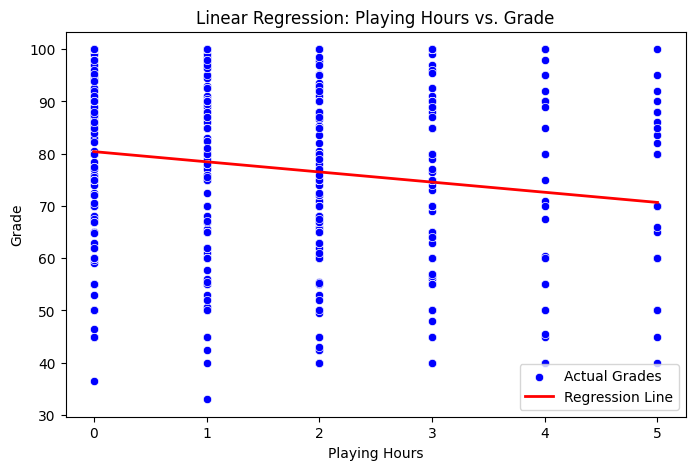

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_single.values.flatten(), y=y, label="Actual Grades", color="blue")
plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Playing Hours")
plt.ylabel("Grade")
plt.title("Linear Regression: Playing Hours vs. Grade")
plt.legend()
plt.show()

In [ ]:
# Looks like the dataset is inaccurate and needs multilinear regression.